# <center>**Resolución Trabajo Práctico Número 1**</center>

#### <center>Visión por computadoras I - CEIA, Fiuba</center>

---

**Alumna:** Gambarte, Antonella Nerea

---


### **Librerias**


In [69]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### **Parte 1**


In [70]:


def white_patch(image):
    image = image.astype('float32')
    
    #  Valor máximo en cada canal (R, G, B)
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    R_max = np.max(R)
    G_max = np.max(G)
    B_max = np.max(B)

    max_vals = np.array([R_max, G_max, B_max])
    
    # Escalar cada canal para que su máximo sea 255
    scale = 255.0 / max_vals
    corrected = image * scale
    
    # Recorte para evitar valores mayores a 255
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    
    return corrected


# Función para procesar imagen con White Patch y mostrar el resultado.
def proccss_image_white_patch(img_path):

    img = cv.imread(img_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    corregida = white_patch(img_rgb)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corregida)
    plt.title('White Patch')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

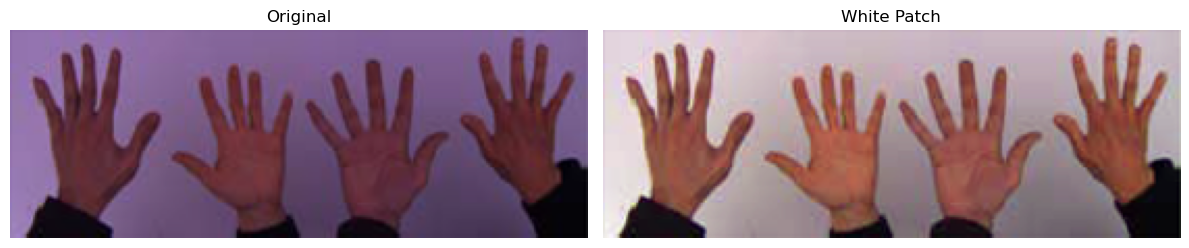

In [71]:
proccss_image_white_patch('assets/TP1/white_patch/test_blue.png')

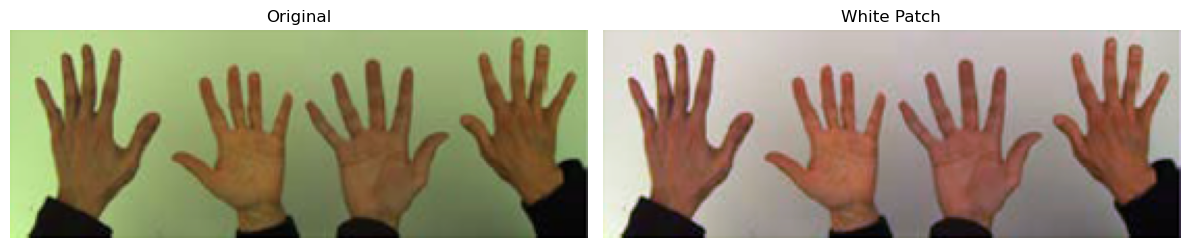

In [72]:
proccss_image_white_patch('assets/TP1/white_patch/test_green.png')

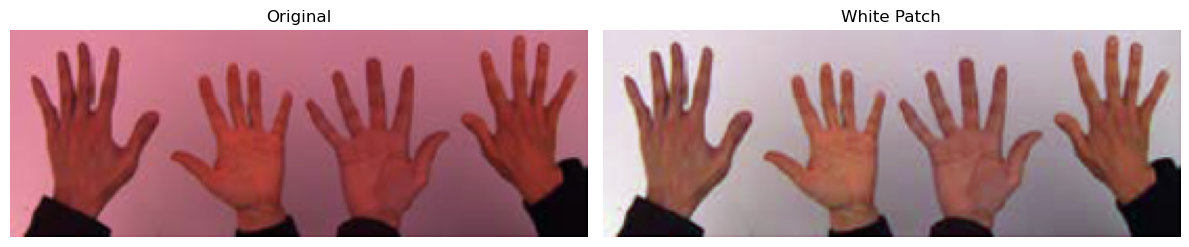

In [73]:
proccss_image_white_patch('assets/TP1/white_patch/test_red.png')

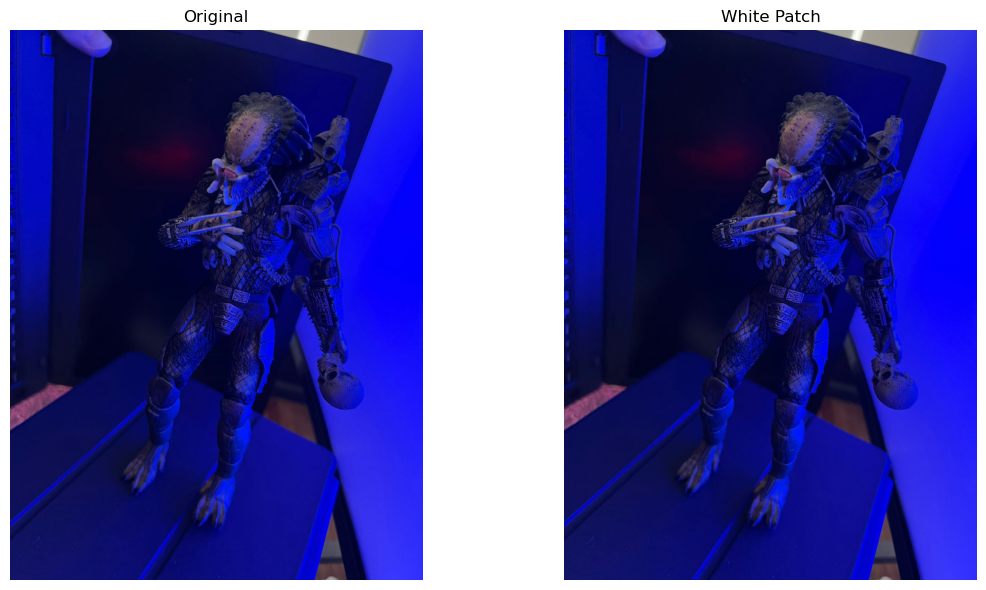

In [74]:
proccss_image_white_patch('assets/TP1/white_patch/wp_blue.jpg')

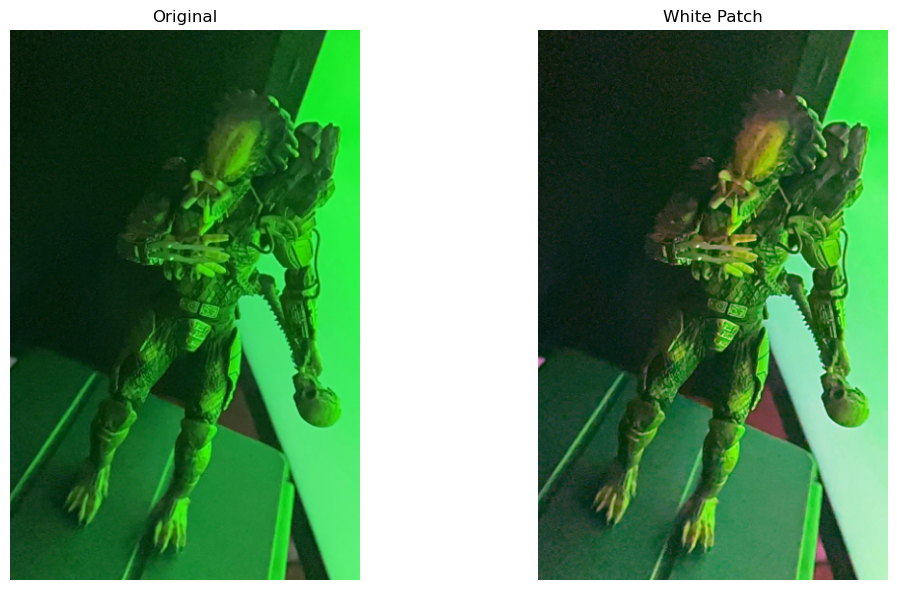

In [75]:
proccss_image_white_patch('assets/TP1/white_patch/wp_green.png')

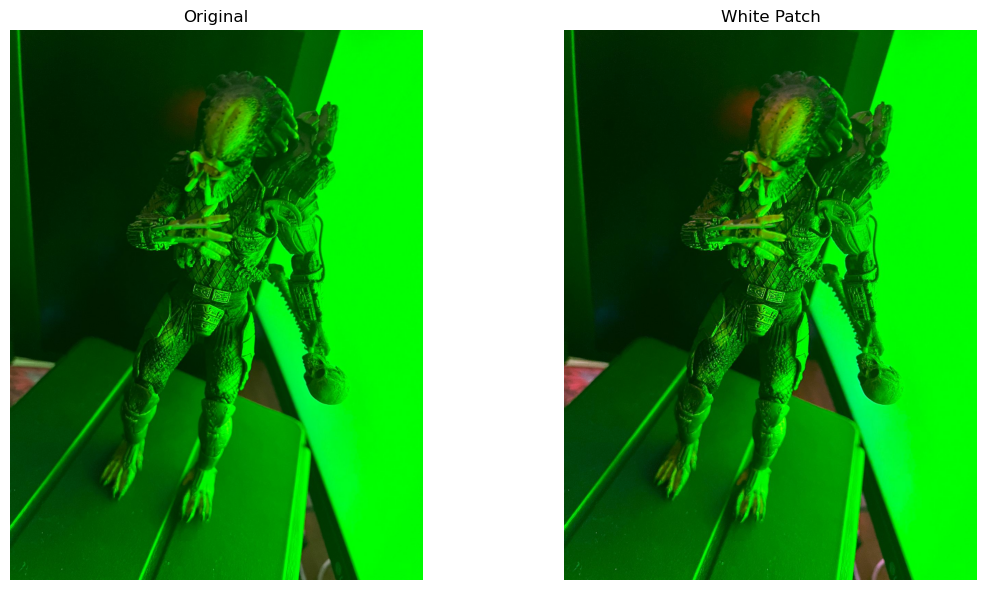

In [76]:
proccss_image_white_patch('assets/TP1/white_patch/wp_green2.jpg')

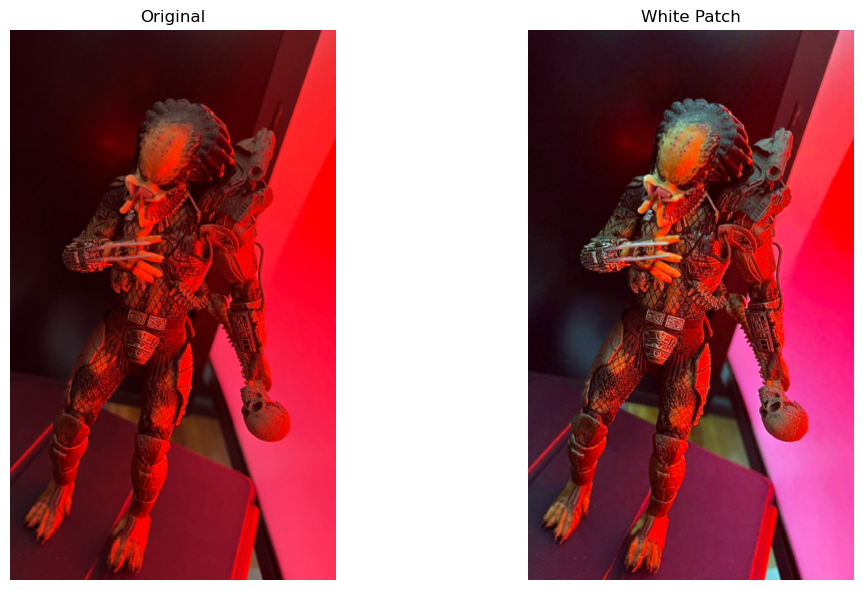

In [77]:
proccss_image_white_patch('assets/TP1/white_patch/wp_red.png')


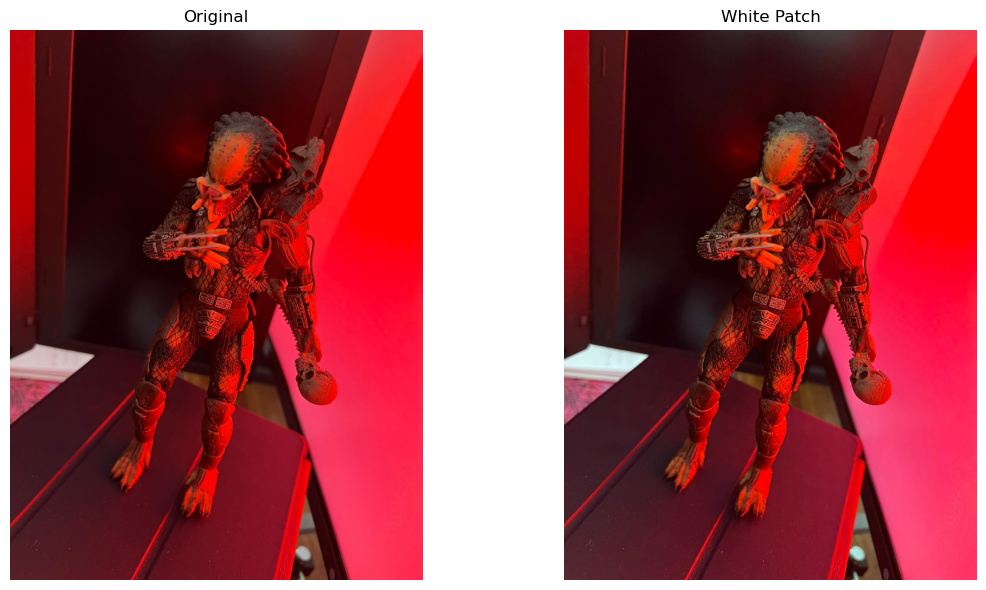

In [78]:
proccss_image_white_patch('assets/TP1/white_patch/wp_red2.jpg')


### **Parte 2**


- Carga de imágenes en escala de grises


In [79]:
img1 = cv.imread('assets/TP1/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('assets/TP1/img2_tp.png', cv.IMREAD_GRAYSCALE)

**Mostramos Imagenes**


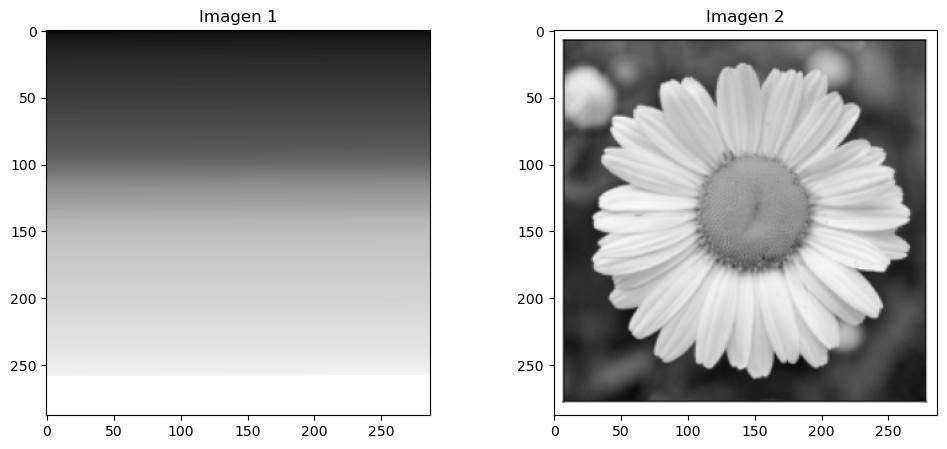

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Imagen 1")
plt.imshow(img1, cmap='gray')
plt.subplot(1,2,2)
plt.title("Imagen 2")
plt.imshow(img2, cmap='gray')
plt.show()



**Histogramas**


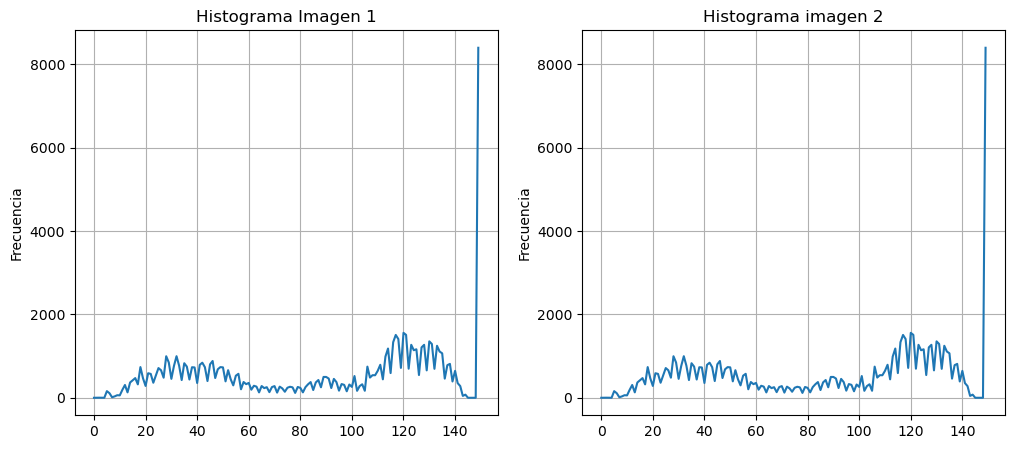

In [81]:


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
hist1_np, bins = np.histogram(img1,150, range=(0, 256))
plt.title('Histograma Imagen 1')
plt.ylabel('Frecuencia')
plt.plot(hist1_np)
plt.grid(True)
plt.subplot(1,2,2)
hist2_np, bins = np.histogram(img2,150, range=(0, 256))
plt.title('Histograma imagen 2')
plt.ylabel('Frecuencia')
plt.plot(hist2_np)
plt.grid(True)
plt.show()

Luego de realizar pruebas con distintos valores de bins se concluye que los histogramas de ambas imágenes muestran una distribución idéntica con tres regiones destacadas correspondientes a los valores oscuros, grises y blancos(este último muestra un pico grande en el extremo derecho).

Si se tuvieran que utilizar los histogramas como features para un problema de clasificación/detección de imágenes no servirían en este caso porque claramente, ante imágenes completamente distintas, los histogramas son iguales. Si no se conocieran dichas imágenes podriamos creer que ambas muestran el mismo objeto.
